<div style="line-height:0.5">
<h1 style="color:#B0EE8F ">  Common practices in Machine Learning 4 </h1>
</div>
<div style="line-height:1.2">
<h4>  22 Scikit-learn examples with tips and tricks. Focus on Pipelines for classification and Ensembles methods. </h4>
</div>
<div style="margin-top: -15px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> ROC / AUC + GridSearchCV + StratifiedKfold + SelectKBest + plot_tree + joblib.dump / load + Features Selection + estimator_html_repr + CountVectorizer
</span>
</div>

<div style="line-height:0.5">
<h1 style="color:#B0EE8F ">  Common practices in Machine Learning 4 </h1>
<h4>  22 Scikit-learn examples with tips and tricks. Focus on Pipelines for classification and Ensembles methods. </h4>
<h3 style="color:lightblue"> Keywords: </h3>  ROC / AUC + GridSearchCV + StratifiedKfold + SelectKBest + plot_tree + joblib.dump / load + Features Selection + estimator_html_repr + CountVectorizer
</div> 

In [23]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.utils import estimator_html_repr
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.datasets import load_iris, make_classification, load_diabetes
from sklearn.feature_selection import SelectPercentile, chi2, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, PolynomialFeatures

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier

import joblib

In [2]:
sklearn.__version__

'1.2.0'

<h2 style="color:#B0EE8F"> <b>Example 1 </b></h2>

<h3 style="color: #B0EE8F;"> Recap CountVectorizer: </h3>
Text feature extraction technique that tokenizes a set of documents and counts the frequency of words in each document. 

In [3]:
""" CountVectorizer.
min_df = minimum document frequency for a term to be included in the vocabulary
max_df = maximum document frequency for a term to be included in the vocabulary
N.B.
Using "vect = CountVectorizer(min_df=2, max_df=0.8)"  lead to errors.
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.
"""

#### Define a collection of text documents
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "A stitch in time saves nine.",
    "Actions speak louder than words."
]
# Create an instance of CountVectorizer with min_df and max_df set
vect = CountVectorizer(min_df=1, max_df=1.0)

# Transform the text data into a matrix of token counts
X = vect.fit_transform(documents)

print(X.toarray()) 

[[0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 2 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1]]


In [4]:
##### Dummy dataset
categories1 = ['cat', 'dog', 'bird']
categories2 = ['small', 'medium', 'large']
categories3 = ['red', 'green', 'blue']
data = {
    'col1': np.random.choice(categories1, size=60),
    'col2': np.random.choice(categories2, size=60),
    'col3': np.random.rand(60),
    'col4': np.random.randint(0, 10, size=60),
    'col5': np.random.choice(categories3, size=60)
}
df = pd.DataFrame(data)

#X = df[:,:-1] #InvalidIndexError: (slice(None, None, None), slice(None, -1, None))
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

df.head(), X.head(), y.head()

(   col1    col2      col3  col4   col5
 0   cat   small  0.238004     5    red
 1  bird  medium  0.092771     9  green
 2  bird   small  0.889664     4    red
 3   dog   small  0.227759     9   blue
 4  bird  medium  0.289743     3  green,
    col1    col2      col3  col4
 0   cat   small  0.238004     5
 1  bird  medium  0.092771     9
 2  bird   small  0.889664     4
 3   dog   small  0.227759     9
 4  bird  medium  0.289743     3,
 0      red
 1    green
 2      red
 3     blue
 4    green
 Name: col5, dtype: object)

<h3 style="color:#B0EE8F"> => Solvers </h3>

**Recap** <br>
liblinear' solver for logistic regression in scikit-learn. <br>
It implements several algorithms for large-scale optimization => LASSO + RIDGE logistic. <br>
It is trained with the log-likelihood of the data given the model. <br>
The algorithm starts with an initial guess for the coefficients and iteratively refines the coefficients until convergence is achieved. <br>

'liblinear' is convenient for: <br>
-- small to medium-sized datasets <br>
-- when the number of features is large compared to the number of samples. <br>
-- when dealing with sparse data, where many of the input features have zero values <br>

In [5]:
""" Logistic Regression with pipeline, to streamline and automate the workflow of the model. 
It makes possible to chain multiple steps together (preprocessing and training).
N.B.
Increase the number of iterations to avoid "ConvergenceWarning: Liblinear failed to converge" !
"""

# Convert categorical features into numerical features
ohe = OneHotEncoder()     
# Convert text data into numerical features
vect = CountVectorizer()  

ct = make_column_transformer((ohe, ['col2']), (vect, 'col1'))
clf = LogisticRegression(solver='liblinear', random_state=1, max_iter=10000000)
pipe = make_pipeline(ct, clf)

**Other solvers:**

'newton-cg': This is a gradient-based optimization method that uses the Newton-Raphson method to find the optimal coefficients. \
It is suitable for both small and large datasets, but it may converge slowly for datasets with many features. 

'lbfgs': This is a gradient-based optimization method that uses the Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) algorithm to find the optimal coefficients. \
It is suitable for both small and large datasets, but it may require more memory than 'liblinear' for very large datasets.

'sag': This is a stochastic gradient-based optimization method that uses the Stochastic Average Gradient (SAG) algorithm to find the optimal coefficients. \
It is suitable for large datasets and can converge faster than other methods for datasets with many samples.

'saga': This is an improved version of the 'sag' solver that also supports L1 regularization. \
    It is suitable for large datasets and can converge faster than other methods for datasets with many samples.

<h3 style="color:#B0EE8F "> => Cross validation  </h3>

In [6]:
""" cross_val_score() 
It represents the performance of the model on the validation set of a cross-validation procedure. 
Accuracy in this case => cross validate the entire pipeline. 
"""
cv_score = cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()
cv_score

0.4333333333333334

<h4 style="color:#B0EE8F "> => Searching for best hyperparameters </h4>

In [7]:
""" GridSearchCV """
params = {}
params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y)

# Get the best score found during the search
print(grid.best_score_)   
# Get the combination of parameters produced the best score
print(grid.best_params_)

0.45
{'columntransformer__countvectorizer__min_df': 1, 'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}


<div style="line-height:0.4">
<h2 style="color:#B0EE8F"> <b> Example 2 <b> </h2>
<h4> Randomized search </h4>
</div>

In [12]:
categories1 = ['cat', 'dog', 'bird']
categories2 = ['tiny', 'small', 'medium', 'large', 'xxlarge']
categories3 = ['red', 'green', 'blue']
data = {
    'col1': np.random.choice(categories1, size=50),
    'col2': np.random.choice(categories2, size=50),
    'col3': np.random.rand(50),
    'col4': np.random.randint(0, 10, size=50),
    'col5': np.random.choice(categories3, size=50)
}
# Create the DataFrame
df = pd.DataFrame(data)
## Split into sets 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X[:3], y[:3]

(  col1   col2      col3  col4
 0  dog  large  0.739189     3
 1  cat  small  0.944446     4
 2  cat  large  0.610173     2,
 0     blue
 1      red
 2    green
 Name: col5, dtype: object)

In [16]:
%%script echo Skipping, see the description of the error
""" Create pipeline wrongly.
N.B.
Common error with a small dataset,
Setting "CountVectorizer(min_df=0.3, max_df=0.8))" means that a term must appear in at least 30% of the documents to be included, 
and a term should not appear in more than 80% of the documents to be included. 
it's possible that no term meets the minimum document frequency threshold of 30%.
Let's increase the size of the dataset, to avoid this issue.
"""
pipe = Pipeline([
    ('countvectorizer',  CountVectorizer(min_df=0.3, max_df=0.8)),
    ('multinomialnb', MultinomialNB())
])

Skipping see the description of the error


In [32]:
n_samples = 20000
categories1 = ['cat', 'dog', 'bird', 'elephant', 'lion', 'tiger', 'giraffe', 'koala', 'panda', 
                'penguin', 'kangaroo', 'zebra', 'rhinoceros', 'sloth']
categories2 = ['tiny', 'small', 'medium', 'large', 'xxlarge']
categories3 = ['red', 'green', 'blue', 'yellow', 'purple', 'pink', 'orange', 'brown', 'gray', 'black']

#### Create dict with random values from the predefined categories
synthetic_data = {
    'col1': np.random.choice(categories1, size=n_samples),
    'col2': np.random.choice(categories2, size=n_samples),
    'col3': np.random.rand(n_samples),
    'col4': np.random.randint(0, 10, size=n_samples),
    'col5': np.random.choice(categories3, size=n_samples)
}
synthetic_df = pd.DataFrame(synthetic_data)
synthetic_df.head()

,col1,col2,col3,col4,col5
0,penguin,tiny,0.573751,8,purple
1,koala,xxlarge,0.552254,6,green
2,koala,xxlarge,0.719854,7,red
3,bird,xxlarge,0.657421,3,green
4,lion,large,0.689238,2,green


In [35]:
### Create some additional arrays with categorical variables related to animals
array1 = np.random.choice(['herbivore', 'carnivore', 'omnivore'], size=n_samples)  
array2 = np.random.choice(['nocturnal', 'diurnal', 'crepuscular'], size=n_samples) 
array3 = np.random.choice(['aquatic', 'terrestrial', 'arboreal'], size=n_samples)  

### Add those additional arrays as new columns in the DataFrame
synthetic_df['animal_diet'] = array1
synthetic_df['animal_activity'] = array2
synthetic_df['animal_habitat'] = array3

synthetic_df.head()
synthetic_df_encoded = pd.get_dummies(synthetic_df, columns=['col1', 'col2', 'col5', 'animal_diet', 
                                                                'animal_activity', 'animal_habitat'])


,col1,col2,col3,col4,col5,animal_diet,animal_activity,animal_habitat
0,penguin,tiny,0.573751,8,purple,herbivore,diurnal,arboreal
1,koala,xxlarge,0.552254,6,green,herbivore,diurnal,terrestrial
2,koala,xxlarge,0.719854,7,red,carnivore,diurnal,terrestrial
3,bird,xxlarge,0.657421,3,green,carnivore,nocturnal,arboreal
4,lion,large,0.689238,2,green,carnivore,crepuscular,aquatic


In [42]:
%%script echo Skipping 1
""" Create a pipeline, with Dataframe and not text documents.
N.B.
Using grid to try values "countvectorizer__min_df" or "countvectorizer__max_df" can lead to and error.
ValueError: max_df corresponds to < documents than min_df
"""
pipe = Pipeline([
    ('countvectorizer',  CountVectorizer()),
    #('countvectorizer',  CountVectorizer(min_df=1, max_df=0.9)),
    ('multinomialnb', MultinomialNB())
])

###### Define the parameter grid
params2 = {}
params2['countvectorizer__min_df'] = [1, 0.3, 0.5, 2]
params2['countvectorizer__max_df'] = [0.5, 1]
params2['countvectorizer__lowercase'] = [True, False]
params2['multinomialnb__alpha'] = sp.stats.uniform(scale=1)

# Define the RandomizedSearchCV object with error_score='raise'
rand = RandomizedSearchCV(pipe, params2, n_iter=10, cv=5, scoring='accuracy', random_state=1, error_score='raise')
# Perform cross validation
rand.fit(X, y)

print(f"rand.best_score_ is\n {rand.best_score_}")
print(f"rand.best_estimator_ is\n {rand.best_estimator_}")
print(f"rand.best_index_ is\n {rand.best_index_}")
print(f"rand.best_params_ is\n {rand.best_params_}")

Skipping


In [43]:
%%script echo Skipping due to overtime 
""" RandomizedSearchCV suboptimal but quicker. 
N.B.
Sometimes the optimal parameter are in between... I need "sp.stats_uniform"."""
params2 = {}
params2['countvectorizer__min_df'] = [1, 2, 3, 4]
params2['countvectorizer__lowercase'] = [True, False]
params2['multinomialnb__alpha'] = sp.stats.uniform(scale=1)

pipe = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('multinomialnb', MultinomialNB())
])

rand = RandomizedSearchCV(pipe, params2, n_iter=10, cv=5, scoring='accuracy', random_state=1)
rand.fit(X, y)

print(f"rand.best_score_ is\n {rand.best_score_}")
print(f"rand.best_estimator_ is\n {rand.best_estimator_}")
print(f"rand.best_index_ is\n {rand.best_index_}")
print(f"rand.best_params_ is\n {rand.best_params_}")

skipping


<div style="line-height:0.4">
<h2 style="color:#B0EE8F"> <b> Example 3 <b> </h2>
<h4> Various GridSearchCV objects with different scoring options </h4>
</div>

In [67]:
""" GridSearchCV.
N.B.
For certain classifiers it is necessary to set the 'probability parameter to True, 
to enable the calculation of class probabilities in addition to class predictions. 
It permits to avoid the warning: "Create model with Change Predict_proba not available when probability=False"
"""
iris = load_iris()
X = iris.data
y = iris.target

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

####### GridSearchCV objects
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_f1_micro = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro')
grid_f1_macro = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro')
grid_roc_auc = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='roc_auc_ovr') 
grid_log_loss = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='neg_log_loss')
grid_mse = GridSearchCV(SVC(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_r2 = GridSearchCV(SVC(), param_grid, cv=5, scoring='r2')

##### Fit the GridSearchCV objects to the data
grid.fit(X, y);
grid_f1_micro.fit(X, y);
grid_f1_macro.fit(X, y);
grid_roc_auc.fit(X, y);
grid_log_loss.fit(X, y);
grid_mse.fit(X, y);
grid_r2.fit(X, y);

############## Get the best score and best parameters for each scoring option
best_score = grid.best_score_
best_params = grid.best_params_
best_score_f1_micro = grid_f1_micro.best_score_
best_score_f1_macro = grid_f1_macro.best_score_
best_score_roc_auc = grid_roc_auc.best_score_
best_params_roc_auc = grid_roc_auc.best_params_
best_score_log_loss = grid_log_loss.best_score_
best_params_log_loss = grid_log_loss.best_params_
best_score_mse = grid_mse.best_score_
best_params_mse = grid_mse.best_params_
best_score_r2 = grid_r2.best_score_
best_params_r2 = grid_r2.best_params_

print("Best accuracy score:", best_score)
print("Best parameters for accuracy score:", best_params)
print("Best F1 score:", best_score_f1_micro)
print("Best F1 score:", best_score_f1_macro)
print("Best ROC AUC score:", best_score_roc_auc)
print("Best parameters for ROC AUC score:", best_params_roc_auc)
print("Best log loss score:", best_score_log_loss)
print("Best parameters for log loss score:", best_params_log_loss)
print("Best MSE score:", best_score_mse)
print("Best parameters for MSE score:", best_params_mse)
print("Best R2 score:", best_score_r2)
print("Best parameters for R2 score:", best_params_r2)

Best accuracy score: 0.9800000000000001
Best parameters for accuracy score: {'C': 1, 'gamma': 0.1}
Best F1 score: 0.9799498746867169
Best F1 score: 0.9799498746867169
Best ROC AUC score: 0.9986666666666666
Best parameters for ROC AUC score: {'C': 1, 'gamma': 1}
Best log loss score: -0.09566188505133123
Best parameters for log loss score: {'C': 10, 'gamma': 0.1}
Best MSE score: -0.02
Best parameters for MSE score: {'C': 1, 'gamma': 0.1}
Best R2 score: 0.97
Best parameters for R2 score: {'C': 1, 'gamma': 0.1}


<div style="line-height:0.4">
<h2 style="color:#B0EE8F"> <b> Example 4 <b> </h2>
<h4> Logistic Regression with StandardScaler </h4>
</div>

In [72]:
""" Logistic Regression.
N.B.
Trying combination of solvers and penalties may lead to warnings.
    1 ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty...
    2 ConvergenceWarning: The max_iter was reached which means the coef_ did not converge...
"""
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create a pipeline with a scaler and logistic regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=100000))
])
#### Define the hyperparameters to tune
params3 = {
    'model__C': [0.1, 1, 10], 
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'] 
}

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, params3, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Convert the results to a DataFrame
results_df = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# Sort
results_df.sort_values('rank_test_score')

results_df.head()

,params,mean_test_score,rank_test_score
0,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.81250,12
1,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.82250,3
2,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.82250,4
3,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.82375,1
4,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.82250,4


<div style="line-height:0.4">
<h2 style="color:#B0EE8F"> <b> Example 5 <b> </h2>
<h4> ROC curve </h4>
</div>

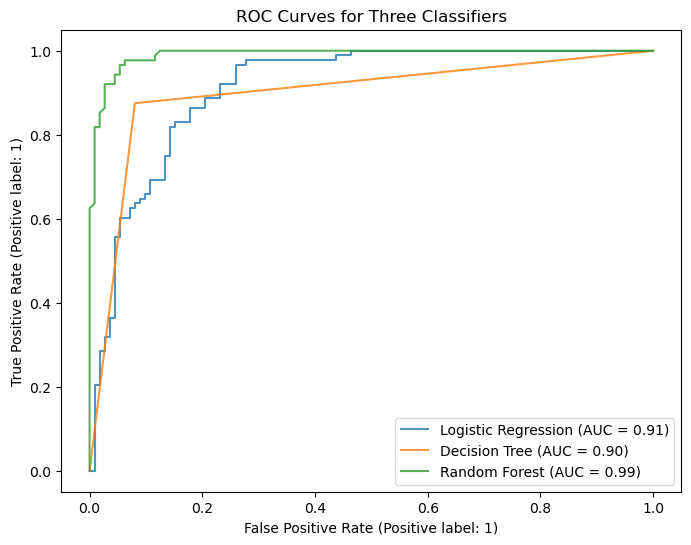

In [70]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

lr.fit(X_train, y_train);
dt.fit(X_train, y_train);
rf.fit(X_train, y_train);

fig, ax = plt.subplots(figsize=(8, 6))

disp = RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, alpha=0.8, name='Logistic Regression')
disp_dt = RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax, alpha=0.8, name='Decision Tree')
disp_rf = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, alpha=0.8, name='Random Forest')

#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
plt.title('ROC Curves for Three Classifiers')
plt.show()

<div style="line-height:0.5">
<h2 style="color:#B0EE8F"> <b> Example 6 <b> </h2>
<h4> Diabetes dataset </h4>
</div>

**Recap:** <br>
The intercept is the value where the regression line intercepts the y-axis --> all the input features are set to zero. <br>
    It is the value of the target variable when all the predictor variables are zero. <br>
    It represents the predicted target value when all the input features have no effect on the target.  <br>

The coefficients are the estimated regression coefficients or weights assigned to each feature/input variable in the linear regression model. <br>
    These coefficients represent the slope of the regression line for each feature, and indicate how much the target variable changes <br> when the corresponding input variable changes by one unit, holding all other input variables constant.

In [73]:
""" Intercept and Coefficients of linear models. Regression model example.
N.B.
attributes with "_" are set during the fit.
"""
datas = load_diabetes()
X, y = datas.data, datas.target
features = datas.feature_names

model_diab = LinearRegression()
model_diab.fit(X, y);

print(model_diab.intercept_)
print(model_diab.coef_)
print()
print(list(zip(features, model_diab.coef_)))
print()
# or better...
for feat, coef in zip(features, model_diab.coef_):
    print(feat, ':', coef)

152.13348416289597
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]

[('age', -10.009866299810621), ('sex', -239.81564367242314), ('bmi', 519.8459200544602), ('bp', 324.38464550232425), ('s1', -792.1756385522305), ('s2', 476.7390210052582), ('s3', 101.04326793803368), ('s4', 177.0632376713466), ('s5', 751.2736995571042), ('s6', 67.62669218370473)]

age : -10.009866299810621
sex : -239.81564367242314
bmi : 519.8459200544602
bp : 324.38464550232425
s1 : -792.1756385522305
s2 : 476.7390210052582
s3 : 101.04326793803368
s4 : 177.0632376713466
s5 : 751.2736995571042
s6 : 67.62669218370473


[Text(0.5, 0.8333333333333334, 's5 <= -0.005\ngini = 0.994\nsamples = 442\nvalue = [1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3\n4, 4, 1, 4, 1, 1, 4, 3, 2, 4, 3, 4, 2, 2\n3, 3, 2, 5, 6, 1, 2, 2, 4, 3, 1, 1, 2, 3\n4, 4, 1, 2, 4, 2, 5, 4, 2, 2, 3, 2, 4, 4\n1, 2, 1, 3, 3, 2, 4, 2, 1, 4, 2, 3, 3, 1\n2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 4, 3, 4\n2, 2, 2, 1, 2, 2, 2, 2, 3, 4, 2, 4, 1, 1\n1, 1, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2\n2, 1, 1, 3, 3, 1, 2, 2, 2, 1, 1, 5, 2, 2\n2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2\n3, 1, 6, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 2\n2, 4, 1, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 3\n2, 1, 2, 2, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2\n1, 3, 2, 2, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1\n1, 1, 1, 1]'),
 Text(0.25, 0.5, 's3 <= 0.032\ngini = 0.989\nsamples = 216\nvalue = [1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 1, 3\n3, 4, 1, 4, 0, 0, 4, 3, 2, 4, 3, 4, 1, 1\n2, 2, 2, 5, 6, 0, 1, 2, 4, 1, 1, 1, 2, 2\n2, 2, 0, 2, 3, 2, 3, 1, 2, 1, 1, 1, 4, 4\n1, 1, 0, 2, 1, 2, 4, 1, 1, 1, 1, 2

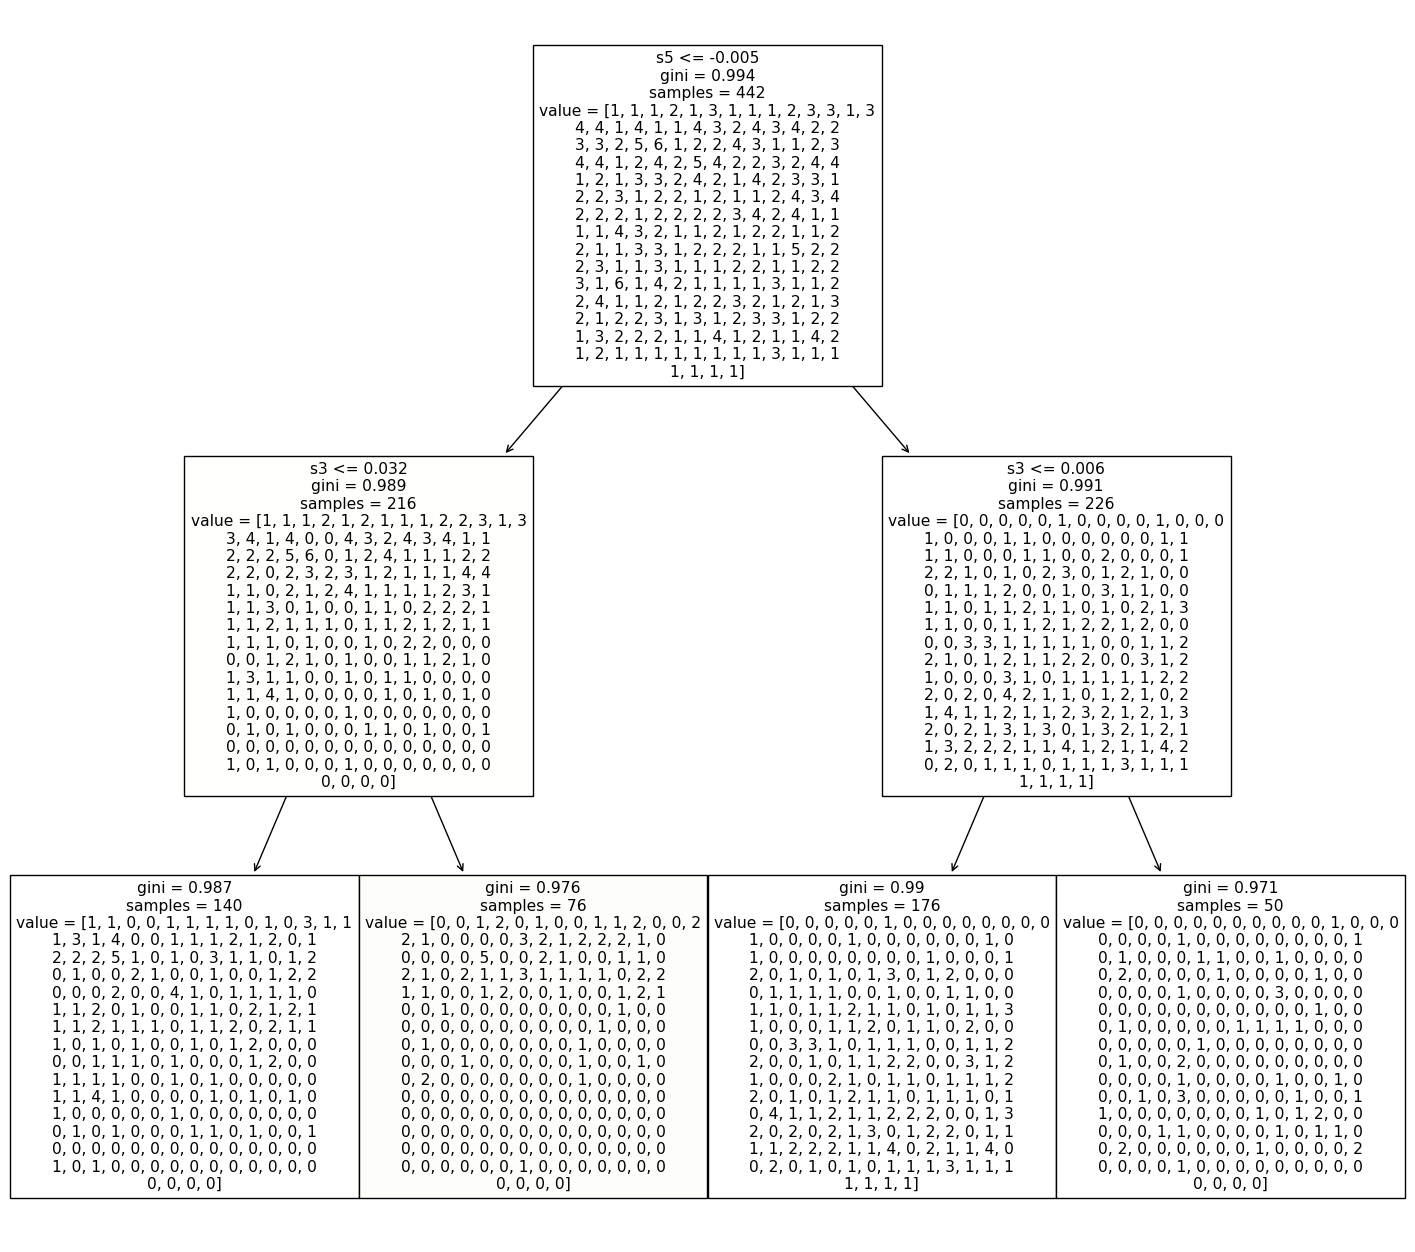

In [75]:
""" DecisionTreeClassifier on same model. """
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y);
plt.figure(figsize=(18, 16))
plot_tree(dt, feature_names=features, filled=True)

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 7 </b></h2>
<h4> Decision Tree Classifier </h4>
</div>

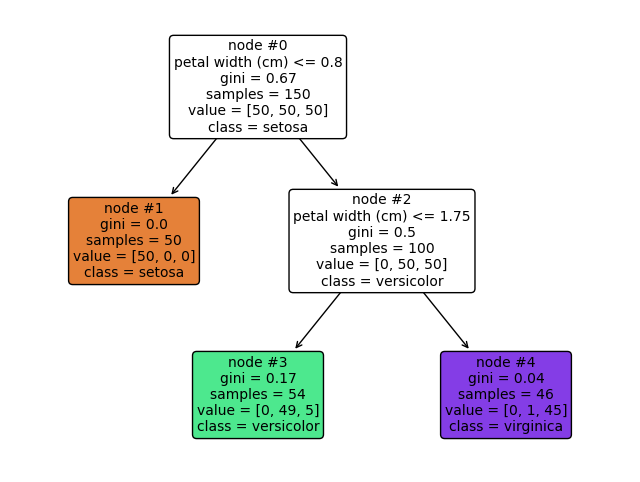

In [76]:
"""" Plot Decision Tree.
N.B 
The plot_tree() function in scikit-learn version 0.21 and earlier does not have the node_color parameter.
"""
iris = load_iris()
X, y = iris.data, iris.target
features = iris.feature_names
class_names = iris.target_names

dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y)

# Set the colors for the boxes in the decision tree
colors = ['lightblue', 'lightgreen', 'pink']

plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=features, class_names=class_names, filled=True, 
        impurity=True, node_ids=True, proportion=False, fontsize=10, 
        rounded=True, precision=2, ax=None) #, node_color=colors) #cmap='Dark2') newer versions
plt.show() 

In [77]:
print(export_text(dt, feature_names=features, show_weights=True))

|--- petal width (cm) <= 0.80
|   |--- weights: [50.00, 0.00, 0.00] class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- weights: [0.00, 49.00, 5.00] class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- weights: [0.00, 1.00, 45.00] class: 2



In [78]:
print(dt.fit(X, y).tree_.node_count)
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0) #pruning increase crossValidationAccuracy
print(dt.fit(X, y).tree_.node_count)

5
17


In [79]:
""" Split the dataset.
N.B.
stratify=y option is fundamental for Imbalanced classes.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)
y_train

array([0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 0])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 8 </b></h2>
<h4> Imputing </h4>
</div>

In [80]:
values = [1, 2, 3, 4, np.nan]
Q = pd.DataFrame(values, columns=['Column 1'])

#imputer = SimpleImputer(strategy='most_frequent')
#imputer = SimpleImputer(strategy='mean')

# Fill_value of 'missing' is only valid for categorical data. This is because the string 'missing' is not a valid numerical value.
data = {'Column 1': ['a','b','c', None]}
R = pd.DataFrame(data)
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(R)


array([['a'],
       ['b'],
       ['c'],
       [None]], dtype=object)

In [81]:
""" KNNImputer with 3 neighbors. 
It will use the mean value of the 3 nearest neighbors to impute the missing values. 
"""
imputer_k = KNNImputer(n_neighbors=3)
imputed_data_k = imputer_k.fit_transform(Q)

In [84]:
""" IterativeImputer with 'random_state=0' for reproducibility. 
It will iteratively impute the missing values using a default estimator, which is a Bayesian Ridge regression model. 
"""
label_encoder = LabelEncoder()
R['Column 1'] = label_encoder.fit_transform(R['Column 1'].astype(str))

ite_imputer = IterativeImputer(random_state=0)
ite_imputed_data = ite_imputer.fit_transform(R)
ite_imputed_data

array([[0.],
       [1.],
       [2.],
       [0.]])

In [86]:
# Train Pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=100000))])

In [90]:
""" Store a trained model to predict later."""
joblib.dump(pipe, './store/pipe.joblib')

['./store/pipe.joblib']

In [92]:
same_pipe = joblib.load('./store/pipe.joblib')
same_pipe.predict(X_test)

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 2, 1, 2, 0, 1])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 9 </b></h2>
<h4> ColumnTransformer  </h4>
</div>

**Recap:** <br>
ColumnTransformer is useful when when it is not possible to pass multiple columns to a single instace of CountVectorizer() <br> 
=> pass the same vectorizer to columnTransformer twice. <br>


- The make_column_transformer object is a way to apply different transformers to different columns of a pandas dataframe. <br>
    Calling the fit_transform method on the make_column_transformer object ct transform the 'Name' and 'Cabin' columns of the X_train <br> using the CountVectorizer transformer. 

- The output of this method is a sparse matrix containing the token counts for each document in the 'Name' and 'Cabin' columns. <br>
    Specifying the columns using strings is only supported for pandas DataFrames.


In [93]:
""" ColumnTransformer """
df = pd.DataFrame({
    'Name': ['John Doe', 'Jane Smith', 'Bob Johnson'],
    'Age': [30, 25, 40],
    'Cabin': ['A1', 'B3', 'C2']
})
df2 = pd.DataFrame({
    'Name': ['Mary Brown', 'Steve Lee', 'Jack Davis'],
    'Age': [35, 28, 45],
    'Cabin': ['D4', 'E2', 'F1']
})

X_train = pd.concat([df, df2])
print(X_train)

vect = CountVectorizer()
ct = make_column_transformer((vect, 'Name'), (vect, 'Cabin'))
ct.fit_transform(X_train)
ct

          Name  Age Cabin
0     John Doe   30    A1
1   Jane Smith   25    B3
2  Bob Johnson   40    C2
0   Mary Brown   35    D4
1    Steve Lee   28    E2
2   Jack Davis   45    F1


ColumnTransformer(transformers=[('countvectorizer-1', CountVectorizer(),
                                 'Name'),
                                ('countvectorizer-2', CountVectorizer(),
                                 'Cabin')])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 10 </b></h2>
<h4> Display the coefficients of the model  </h4>
</div>

In [94]:
X = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Age': [25, 30, 35, 20, 25],
    'Income': [50000, 60000, 70000, 45000, 55000]
})
y = [0, 1, 1, 0, 1]

pipe1 = Pipeline([('ohe', OneHotEncoder()), ('clf', LogisticRegression())])
pipe1.fit(X, y)

print(pipe1.named_steps.clf.coef_)
print(pipe1.named_steps['clf'].coef_)
print(pipe1['clf'].coef_)
print(pipe1[1].coef_)
print(pipe1[-1].coef_)


[[-0.63356054  0.6335627  -0.29869838 -0.09532568  0.19701311  0.19701311
  -0.29869838 -0.33486215  0.23953647  0.19701311  0.19701311]]
[[-0.63356054  0.6335627  -0.29869838 -0.09532568  0.19701311  0.19701311
  -0.29869838 -0.33486215  0.23953647  0.19701311  0.19701311]]
[[-0.63356054  0.6335627  -0.29869838 -0.09532568  0.19701311  0.19701311
  -0.29869838 -0.33486215  0.23953647  0.19701311  0.19701311]]
[[-0.63356054  0.6335627  -0.29869838 -0.09532568  0.19701311  0.19701311
  -0.29869838 -0.33486215  0.23953647  0.19701311  0.19701311]]
[[-0.63356054  0.6335627  -0.29869838 -0.09532568  0.19701311  0.19701311
  -0.29869838 -0.33486215  0.23953647  0.19701311  0.19701311]]


**Recap:** <br>
Cross validation NOT in arbitrary order! <br>
=> shuffle ! using Kfold or StratifiedKfold (regression, classification), to avoid receive the same score everytime. <br>

In [95]:
""" 
N.B. 1
    The output of "cross_val_score" is an array of accuracy scores, one for each fold of the cross-validation. (5 in this case)
    Some scoring metric return a single score, such as 'roc_auc' or 'f1'.
N.B. 2
    'kf' and 'skf' are iterators! 
N.B. 3
    Setting the random seed for reproducibility to ensure that the same random numbers are generated every time the code is run.   
    Otherwise the random numbers generated by the NumPy random number generator will be different every time the code is run.
N.B. 4 
    Using stratified for regression does not make sense!
"""
np.random.seed(1)
## Sample dataset for regression
X_reg = np.random.rand(100, 5)
y_reg = np.random.rand(100)
## Sample dataset for classification
X_clf = np.random.rand(100, 5)
y_clf = np.random.choice([0, 1], size=100, p=[0.3, 0.7])

reg = LinearRegression()
clf = LogisticRegression()

# Perform k-fold validation with regression 
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='r2')

# Performi Stratified k-fold validation to preserve the proportion of class in each split
skf = StratifiedKFold(5, shuffle=True, random_state=1)
cross_val_score(clf, X_clf, y_clf, cv=skf, scoring='accuracy')

array([0.7 , 0.7 , 0.75, 0.75, 0.75])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 11 </b></h2>
<h4> AUC (Area Under the Curve)   </h4>
</div>

In [96]:
""" AUC metric for binary classification to handle IMBALANCED classes with multicalls problem.
N.B. 1 
    multi_class='ovr' in the LogisticRegression constructor to use the one-vs-rest (OvR) strategy for multiclass classification. 
    If there are more than two classes, scikit-learn automatically uses OvR by default!
N.B. 2
    The one-vs-all strategy is simpler to implement and faster to train, 
    but may produce biased results if the class distribution is imbalanced. 
N.B. 3 
    The one-vs-one strategy can handle imbalanced class distributions more effectively, 
    but requires training more classifiers and can be slower to train and predict for large datasets.
"""

# Sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=4, random_state=0)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Logistic regression classifier
clf = LogisticRegression(random_state=0, multi_class='ovr')
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Predict probabilities for the testing data
y_score = clf.predict_proba(X_test)
# compute the ROC AUC score for the testing data ==> Receiver Operating Characteristic Area Under the Curve
roc_auc_score(y_test, y_score, multi_class='ovo')

0.8099570094301894

In [97]:
cross_val_score(clf, X, y, cv=5, scoring='roc_auc_ovo').mean()

0.7963797118847538

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 12 </b></h2>
<h4> FunctionTransformer   </h4>
</div>

Convert existing function to trasformers to use a custom tranformation to pre-process data.   <br>
**Recap:** <br>
The numpy Clip method can limit the values in an array. <br>
Given an interval, values outside the interval are clipped to the interval edges.  <br>
For example, if an interval of ``[0, 1]`` is specified, values smaller than 0 become 0, and values larger than 1 become 1. <br>

In [98]:
def first_letter(df):
    """ Extract the first letter from each string. """
    return df.apply(lambda x: x.str.slice(0,1))

In [99]:
data = {'Code': ['A123', 'B456', 'C789', 'D012', 'E345'],
        'Deck': ['AB', 'BC', 'CD', 'DE', 'EF'],
        'Fare': [10.5, 20.3, 15.7, 8.2, 12.4]}
df = pd.DataFrame(data)

clip_values = FunctionTransformer(np.clip, kw_args={'a_min':100, 'a_max':500}) 

get_first_letter = FunctionTransformer(first_letter)

ct = make_column_transformer((clip_values, ['Fare']), (get_first_letter, ['Code', 'Deck']))
ct.fit_transform(df)

array([[100.0, 'A', 'A'],
       [100.0, 'B', 'B'],
       [100.0, 'C', 'C'],
       [100.0, 'D', 'D'],
       [100.0, 'E', 'E']], dtype=object)

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 13 </b></h2>
<h4> Pipeline with features selction   </h4>
</div>

In [100]:
""" Features selection with SelectPercentile
It is used to keep highest scoring features + add feature selection after preprocessing but before model building 
"""
X = ['this is a sentence', 'another sentence', 'hello world', 'yet another sentence']
y = [1, 0, 1, 0]

vect = CountVectorizer()
clf = LogisticRegression()
selection = SelectPercentile(chi2, percentile=50)
pipe = make_pipeline(vect, selection, clf)
a = cross_val_score(pipe, X, y, scoring='accuracy', cv=2).mean()
a

0.5

### => Support Vectors for Classificiation 

In [101]:
""" SVC: The strength of the regularization is inversely proportional to C. """
clf2 = SVC(C=0.1, kernel='linear')  


In [102]:
""" Display the estimator as diagrams and export it to a file. """
logreg = LogisticRegression()
pipa = make_pipeline(ct, selection, logreg)
pipa

with open('./store/pipa_html.html', 'w') as f:
    f.write(estimator_html_repr(pipa))

In [103]:
dff = load_iris(as_frame=True)['frame']
print(dff.head())
xx, yy = load_iris(as_frame=True, return_X_y=True) # get the target in a separated series
print()
print(xx.head())
print()
print(yy.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               

In [104]:
clf.get_params() #print only the params that have been changed

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
""" Set global scikit-learn configuration. 
Here, it is just used to specify to print all parameters

'set_config()' parameters: 
    + assume_finite=None,
    + working_memory=None,
    + print_changed_only=None,
    + display=None,
    + pairwise_dist_chunk_size=None,
    + enable_cython_pairwise_dist=None,
    + array_api_dispatch=None,
    + transform_output=None,
    + enable_metadata_routing=None,
    + skip_parameter_validation=None
"""
set_config(print_changed_only=False) 
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 14 </b></h2>
<h3> Encoding </h3>
</div>

In [106]:
""" Binary encoding"""
dataf = pd.DataFrame({
    'SS': ['ssanne', 'ssmary', 'ssgiuliet'],
    'Color': ['blue', 'red', 'red']
})

# ohe1 = OneHotEncoder(sparse=False, drop=None) # FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 
ohe1 = OneHotEncoder(sparse_output=False, drop=None)
o1 = ohe1.fit_transform(dataf)
ohe2 = OneHotEncoder(sparse_output=False, drop='first') # avoid redundant info => not recommended! even if drop avoid multicollinearity
o2 = ohe2.fit_transform(dataf)

print(ohe1)
print(o1)
print()
print(ohe2)
print(o2)

ohe3 = OneHotEncoder(sparse_output=False, drop='if_binary') #with this it drop the first category only if it takes binary features! the SS is encoded in multiple column
ohe3.fit_transform(dataf)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', max_categories=None, min_frequency=None,
              sparse='deprecated', sparse_output=False)
[[1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1.]]

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', max_categories=None, min_frequency=None,
              sparse='deprecated', sparse_output=False)
[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]


array([[1., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 1., 0., 1.]])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 15 </b></h2>
<h4> passthrough and drop options </h4>
</div>

In [107]:
"""  in a ColumnTransormer = apply different preprocessing to different columns""" 

dataf1 = pd.DataFrame({
    'A': [1.1, 2.3, np.nan],
    'B': [13, 54, 43],
    'C': [192, 295, np.nan],
    'D': [1_032, 2_327, 3_021],
    'E': [10_213, 20_323, 30_000],
})
print(dataf1)

impute = SimpleImputer(strategy='mean')


ct = make_column_transformer(
    (impute, ['A']),
    ('passthrough', ['B', 'C']),
    remainder = 'drop')

ct.fit_transform(dataf1)

     A   B      C     D      E
0  1.1  13  192.0  1032  10213
1  2.3  54  295.0  2327  20323
2  NaN  43    NaN  3021  30000


array([[  1.1,  13. , 192. ],
       [  2.3,  54. , 295. ],
       [  1.7,  43. ,   nan]])

In [108]:
""" Tranform columns but in a different way to handle the case, 
in which the num of columns to pasthrough is greater thn the number of columns to drop """
ct = make_column_transformer(
    (impute, ['A']),
    ('drop', ['D', 'E']),
    remainder = 'passthrough')

ct.fit_transform(dataf1)

array([[  1.1,  13. , 192. ],
       [  2.3,  54. , 295. ],
       [  1.7,  43. ,   nan]])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 16 </b></h2>
<h4> Ordinal encoders and Regression </h4>
</div>

In [109]:
data = {
    'Sex': ['male', 'female', 'male', 'male', 'female'],
    'Color': ['red', 'green', 'blue', 'red', 'green'],
    'Size': ['small', 'medium', 'large', 'small', 'medium'],
    'Price': [10, 20, 30, 40, 50],
    'Rating': [4.5, 3.2, 2.1, 4.0, 3.8]
}
df = pd.DataFrame(data)

categ_cols = ['Sex', 'Color', 'Size']
X = df[categ_cols]
y = df['Rating']

ohe = OneHotEncoder()
ohe_transformed = ohe.fit_transform(X)
print(ohe_transformed.shape)

oe = OrdinalEncoder()
oe_transformed = oe.fit_transform(X)
print(oe_transformed.shape)

(5, 8)
(5, 3)


In [110]:
%%script echo Skipping, left to show wrong example.
# pipeline
ohe = OneHotEncoder(handle_unknown="ignore")
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
ohe_pipe = make_pipeline(ohe, rf)

# cross-validate pipeline
%time
scores = cross_val_score(ohe_pipe, X, y, error_score='raise', cv=2)     #cross_val num must be lower than classes
print(scores.mean())

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


ValueError: Unknown label type: 'continuous'

In [ ]:
""" Correct example """
data = {
    'Sex': ['male', 'female', 'male', 'male', 'female'],
    'Color': ['red', 'green', 'blue', 'red', 'green'],
    'Size': ['small', 'medium', 'large', 'small', 'medium'],
    'Price': [10, 20, 30, 40, 50],
    'Rating': [4.5, 3.2, 2.1, 4.0, 3.8]
}
df = pd.DataFrame(data)

# Categorical columns
categ_cols = ['Sex', 'Color', 'Size']

# Separate X (features) and y (target)
X = df[categ_cols]
y = df['Rating']

# Preprocess categorical features using OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categ_cols)
    ])

# Define the random forest regressor
rf_regressor = RandomForestRegressor(random_state=1, n_jobs=-1)

# Create a pipeline that applies preprocessing and regression
regressor_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])

# Cross-validate the pipeline
scores = cross_val_score(regressor_pipe, X, y, cv=2)
print("Cross_validation scores: {}".format(scores.mean()))

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 17 </b></h2>
<h4> Grid Search </h4>
</div>

In [ ]:
""" Search fo best parameters.
> n_jobs = Number of jobs to run in parallel.
> None means 1 unless in a :obj:`joblib.parallel_backend` context.
> -1 means using all processors.
"""
X, y = make_classification(n_samples=1000, n_features=10, n_classes=6, n_informative=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
svc = SVC(random_state=1)
pipe = make_pipeline(scaler, svc)

params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}

grid = GridSearchCV(pipe, params, cv=3)
grid2 = GridSearchCV(pipe, params, n_jobs=-1)

%time grid.fit(X_train, y_train)
%time grid2.fit(X_train, y_train)

best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print('Test score:', test_score)

CPU times: user 1.66 s, sys: 368 µs, total: 1.66 s
Wall time: 1.98 s
CPU times: user 121 ms, sys: 67.5 ms, total: 189 ms
Wall time: 2.88 s
Test score: 0.625


<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 18 </b></h2>
<h4> Polynomial Features </h4>
</div>

**Recap:** <br>
The PolynomialFeatures transformer generates a new feature matrix consisting of all polynomial combinations of the input features up to a certain degree. 

In [111]:
""" Create interaction features from the input features in your data using PolynomialFeatures object
to include features interactions in the model. 

N.B.1
    'interaction_only=True' means that only interaction features will be created, 
    which are the products of the input features without raising them to any power.
N.B.2
    'include_bias=False' means that the resulting feature matrix will not include an additional column of 1s, 
    which corresponds to the intercept term in a linear regression model.
    => ouput columns are = A,B,C,A*B,A*C,B*C
"""

poly = PolynomialFeatures(include_bias=False, interaction_only=True)

dat = {
    'A': [1,2,3],
    'B': [4,4,4],
    'C': [0,10,100],
}
dfdat = pd.DataFrame(dat)
poly.fit_transform(dfdat) 

array([[  1.,   4.,   0.,   4.,   0.,   0.],
       [  2.,   4.,  10.,   8.,  20.,  40.],
       [  3.,   4., 100.,  12., 300., 400.]])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 19 </b></h2>
<h4> Ensemble methods </h4>
</div>

In [3]:
""" 
N.B. 
In kfold validation, each split divides the data into training and validation sets for model evaluation.
By default, cv parameter (the nun of splits) is set to 5 if not explicitly specified. 
Pay attention to the warning:
"UserWarning: The least populated class in y has only x members, which is less than n_splits=5"
"""
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [9, 10], [11, 12], [12, 13], [14, 15], [16, 17], 
    [17, 18], [19, 20], [21, 22], [22,23], [23, 24]]
y = [2, 1, 3, 4, 1, 4, 0, 3, 1, 2, 0, 2, 4, 3, 1, 0]

lr = LogisticRegression(solver='liblinear', random_state=1)
cvs_1 = cross_val_score(lr, X, y, cv=3, error_score='raise').mean()

rfc = RandomForestClassifier(max_features=None, random_state=1)
cvs_2 = cross_val_score(rfc, X, y, cv=3, error_score='raise').mean()

vc = VotingClassifier([('clf1', lr), ('clf2', rfc)], voting='soft')
cvs_3 = cross_val_score(vc, X, y, cv=3, error_score='raise').mean()

nb = MultinomialNB()
vc1 = VotingClassifier([('clf1', lr), ('clf2', rfc), ('clf3', nb)])
cvs_4 = cross_val_score(vc1, X, y, cv=3, error_score='raise').mean()

print(cvs_1)
print(cvs_2)
print(cvs_3)
print(cvs_4)

0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888


In [4]:
""" The 'cv' parameter for KFold is used internally by GridSearchCV, but it cannot be passed as paramter in the grid.
To set the number of splits for GridSearchCV, it is necessary to pass in a cross-validation object like KFold explicitly.
"""
parameters_to_try = {'voting':['hard', 'soft'],
                    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}

#gridd = GridSearchCV(vc1, parameters_to_try)

kf = KFold(n_splits=3)
gridd = GridSearchCV(vc1, parameters_to_try, cv=kf)

gridd.fit(X, y)
gridd.best_params_

{'voting': 'hard', 'weights': (1, 1, 2)}

In [5]:
gridd.best_score_

0.13333333333333333

<h3 style="color:#B0EE8F"> => ColumnTransformer: </h3>

In [6]:
""" Tune multiple pipeline separatedly, no need to create more than 1 pipeline. """

ct11 = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
    ('vectorizer', CountVectorizer(), ['Name']),
    ('imputer', SimpleImputer(), ['Age']),
    ]
)


clf11 = LogisticRegression(solver='liblinear', random_state=1)
clf12 = RandomForestClassifier(random_state=1)

pipe = Pipeline([('preprocessor', ct11), ('classifier', clf11)])

parameters_to_try1 = {}
#parameters_to_try1['preprocessor__vectorizer__ngram_range'] = [(1,1), (1,2)]
parameters_to_try1['classifier__penalty'] = ['l1', 'l2']
parameters_to_try1['classifier__C'] = [0.1, 1, 10]
# Add also the choice on the classifier ! not a string! clf11 is a model 
parameters_to_try1['classifier'] = [clf11]   

parameters_to_try2 = {}
parameters_to_try2['preprocessor__vectorizer__ngram_range'] = [(1,1), (1,2)]
parameters_to_try2['classifier__n_estimators'] = [100, 200, 250]
parameters_to_try2['classifier__min_samples_leaf'] = [1, 2]
parameters_to_try2['classifier'] = [clf12] 


 Valid parameters for RandomForestClassifier are:   
['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split',    
 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [7]:
kf = KFold(n_splits=3)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [8]:
X_df.columns

RangeIndex(start=0, stop=2, step=1)

In [9]:
params = [parameters_to_try1, parameters_to_try2]
params

[{'classifier__penalty': ['l1', 'l2'],
  'classifier__C': [0.1, 1, 10],
  'classifier': [LogisticRegression(random_state=1, solver='liblinear')]},
 {'preprocessor__vectorizer__ngram_range': [(1, 1), (1, 2)],
  'classifier__n_estimators': [100, 200, 250],
  'classifier__min_samples_leaf': [1, 2],
  'classifier': [RandomForestClassifier(random_state=1)]}]

In [10]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Sex']),
                                                 ('vectorizer',
                                                  CountVectorizer(), ['Name']),
                                                 ('imputer', SimpleImputer(),
                                                  ['Age'])])),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 21 </b></h2>
<h4> Column Transformer #1 </h4>
</div>

In [11]:
# Sample data with missing values
data = {
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Name': ['John Doe', 'Jane Smith', 'Tom Johnson', 'Emily Brown', 'David Lee'],
    'Age': [30, None, 35, 28, None],
    'Target': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Splitting the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # impute missing values for categorical data
    ('onehot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [12]:
""" Text transformers? 
N.B.
Using text_transformer in a ColumnTransformer, together with the  categorical_transformer with 'categorical_transformer' and 'numerical_transformer' will lead to a mismatch error. 
"ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 1"
Therefore in a ColumnTransformer all shapes of the individual transformers need to be suited for the problem.

The simple solution to solve the issue here is to just encode the 'Name' column value into integers with a label encoder.
"""
# text_transformer = Pipeline([
#     ('vectorizer', CountVectorizer())
# ])

# text_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('vectorizer', CountVectorizer())
# ])

# text_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('vectorizer', CountVectorizer(dtype=np.str_))  # Specify dtype as str
# ])

# text_transformer = Pipeline(steps=[
#     ('to_string', TextToStringTransformer()),
#     ('vectorizer', CountVectorizer())
# ])

# Not actually used 
text_transformer = Pipeline([
    ('vectorizer', CountVectorizer())
])

label_encoder = LabelEncoder()
X['Name'] = label_encoder.fit_transform(X['Name'])

print(X.head())

      Sex  Name   Age
0    Male     3  30.0
1  Female     2   NaN
2    Male     4  35.0
3  Female     1  28.0
4    Male     0   NaN


In [13]:
X_cat = categorical_transformer.fit_transform(X[['Sex']])
X_num = numerical_transformer.fit_transform(X[['Age']])
X_text = text_transformer.fit_transform(X)

print("Shape of categorical_transformer output:", X_cat.shape)
print("Shape of numerical_transformer output:", X_num.shape)
print("Shape of text_transformer output:", X_text.shape)

Shape of categorical_transformer output: (5, 2)
Shape of numerical_transformer output: (5, 1)
Shape of text_transformer output: (3, 3)


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Sex']),
        ('num', numerical_transformer, ['Age']),
        #('text', text_transformer, ['Name']) #removed! 
    ],
    remainder='passthrough' 
)

# Check the shape of each transformer's output
X_transformed = preprocessor.fit_transform(X)
print("Shape of transformed data:", X_transformed.shape)

# Classifiers
clf11 = LogisticRegression(solver='liblinear', random_state=1)
clf12 = RandomForestClassifier(random_state=1)

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf11) 
])

# Pipeline training
pipe.fit(X, y)

Shape of transformed data: (5, 4)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [18]:
""" Use the fitted pipeline to make predictions on the new data """
new_data = {
    'Sex': ['Female', 'Male'],
    'Name': ['Anna White', 'Michael Johnson'],
    'Age': [25, 40]
}

df_new = pd.DataFrame(data)
label_encoder = LabelEncoder()
df_new['Name'] = label_encoder.fit_transform(X['Name'])

X_new = df_new.drop('Target', axis=1) 

predictions = pipe.predict(X_new)
predictions

array([1, 0, 1, 0, 1])

<h3 style="color:#B0EE8F"> => Custom Transformers for label encoding  </h3>

In [20]:
class LabelEncodeTransformer(TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.label_encoders[column] = le
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column, le in self.label_encoders.items():
            X_encoded[column] = le.transform(X[column])
        return X_encoded

# Sample data
data = {
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Name': ['John Doe', 'Jane Smith', 'Tom Johnson', 'Emily Brown', 'David Lee'],
    'Age': [30, None, 35, 28, None],
    'Target': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Splitting the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Use the custom transformer
label_encoder_transformer = LabelEncodeTransformer()
X_encoded = label_encoder_transformer.fit_transform(X)

print(X_encoded)

   Sex  Name  Age
0    1     3    1
1    0     2    3
2    1     4    2
3    0     1    0
4    1     0    3


<h3 style="color:#B0EE8F"> => Add the label encoding to the Custom Transformers </h3>

In [22]:
# Sample data with missing values
data = {
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Name': ['John Doe', 'Jane Smith', 'Tom Johnson', 'Emily Brown', 'David Lee'],
    'Age': [30, None, 35, 28, None],
    'Target': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Splitting the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Custom transformer to apply label encoding to specified columns
class LabelEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column in self.columns:
            le = LabelEncoder()
            X_encoded[column] = le.fit_transform(X[column])
        return X_encoded

# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Sex']),
        ('num', numerical_transformer, ['Age']),
        ('label_encode', LabelEncodeTransformer(columns=['Name']), ['Name']) 
    ],
    remainder='passthrough' 
)

# Fit the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Check the shape of preprocessed data
print("Shape of preprocessed data:", X_transformed.shape)

# Classifier
clf11 = LogisticRegression(solver='liblinear', random_state=1)

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf11) 
])

# Fit the pipeline to the data
pipe.fit(X, y)

Shape of preprocessed data: (5, 4)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('label_encode',
                                                  LabelEncodeTransformer(columns=['Name']),
                                                  ['Name'])])),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 21 </b></h2>
<h4> Column Transformer #2 </h4>
</div>

In [33]:
data = {
    'Age': [25, 30, 35, 40, 45],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
    'Income': [50000, 60000, 75000, 80000, 90000],
    'Label': [0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

X = df[['Age', 'Gender', 'Income']]
y = df['Label']

# Define the preprocessing steps for different columns using ColumnTransformer
# Standardizing the 'Age' column and one-hot encode the 'Gender' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),            
        ('cat', OneHotEncoder(), ['Gender'])          
    ],
    remainder='passthrough'  
)

# Create a pipeline that includes the preprocessing step and a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [32]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


<div style="line-height:0.3">
<h2 style="color:#B0EE8F"> <b>Example 22 </b></h2>
<h4> SelectKBest </h4>
</div>

In [152]:
X, y = make_classification(n_samples=100, n_features=10)

pipe = make_pipeline(
    SelectKBest(f_classif, k=5),
    RandomForestClassifier(random_state=1)
)
scores = cross_val_score(pipe, X, y, cv=5)

print(X[:10])
print(y[:10])
print()
print('Cross-validation score:', scores.mean())

[[-0.25361932 -0.3060365  -0.09599849 -0.12640833 -1.58195978 -0.45766267
   0.51031498 -2.73914174  0.46575756 -1.17392026]
 [ 1.11033788 -0.70721776 -0.81170232  0.19787862  1.18976972  1.27475838
  -1.4717867  -0.3565606   0.68050805  0.69403198]
 [-0.58357615 -1.64461881  1.95899873 -0.24424017 -0.18840285 -1.54448713
  -1.08760279 -0.79226631 -0.79666242  0.28120061]
 [ 0.93917267 -0.81656147 -1.90322916  0.16035604 -0.70158727 -2.04999323
   0.90461952 -0.87348911 -2.19489265 -0.91817768]
 [-0.40159445 -1.3667897   1.83784369 -0.24940568 -0.40984236 -0.99946229
  -0.23818502  1.7092077  -0.86171592  0.09386243]
 [-0.24831899  1.8430945  -1.05343191  0.20127046  0.9054659  -0.97784699
   1.66777823  0.7798494   1.41490115  0.43509704]
 [-1.86986054  0.48714002  1.08050655 -0.10577474  0.22884732  0.85827418
   0.02260113 -1.80464689  0.88869014  0.39771706]
 [ 0.58734305 -0.49776365 -1.87587742  0.15182841 -0.76306402  0.80252668
   0.76694847 -1.05760927 -1.02430041 -0.95715641]
